INTEGRANTES
- Miguel Angel Nava Perez
- Ana Luisa Parra Valencia

<h2> Parte 2 </h2>
clasificación

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, precision_recall_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


Procedemos a leer el dataframe, imprimimos la información del dataframe para saber donde hay datos nulos, y también para saber que datos son tipo string o "object", para poder transformarlos a numericos, con el fin de utilizarlos en los modelos de clasificación, los cuales usan datos numericos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
stroke
0    4861
1     249
Name: count, dtype: int64


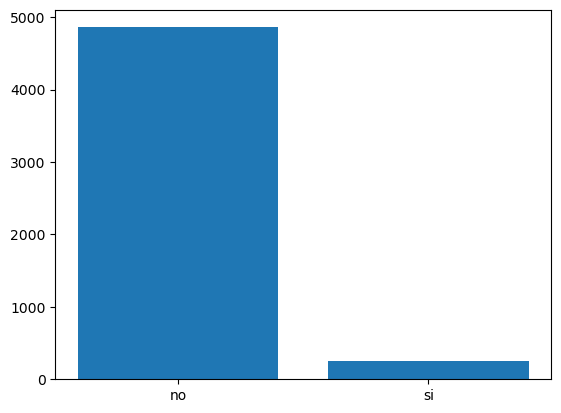

In [2]:
df = pd.read_csv("archivos/healthcare-dataset-stroke-data.csv")
df_completo = df.copy()
print(df.info())
df['bmi'] = df.groupby('stroke')['bmi'].transform(lambda x: x.fillna(x.mean()))
x=["no","si"]
y= df["stroke"].value_counts()
print(y)
plt.bar(x,y)
plt.show()

se puede observar que la inmensa mayoría de pacientes no han sufrido un ACV, obteniendo que de los 5000 pacientes, solo 249 si han sufrido un ACV, esto destaca la importancia de siempre evitar un falso negativo a la hora de la clasificación.

ahora procedemos a transformar los datos categoricos a numéricos para su utilización en los modelos, por medio de LabelEncoder de Scikit-Learn, y eliminaremos de este dataframe de trabajo las columnas de datos categoricos o tipo "object"

In [3]:
LE = LabelEncoder()
df["gender_c"] = LE.fit_transform(df["gender"])
df["ever_married_c"] = LE.fit_transform(df["ever_married"])
df["work_type_c"] = LE.fit_transform(df["work_type"])
df["Residence_type_c"] = LE.fit_transform(df["Residence_type"])
df["smoking_status_c"] = LE.fit_transform(df["smoking_status"])
cols_to_drop = ['id', 'gender', 'ever_married', 'work_type',
                'Residence_type', 'smoking_status']
df = df.drop(columns=cols_to_drop)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   avg_glucose_level  5110 non-null   float64
 4   bmi                5110 non-null   float64
 5   stroke             5110 non-null   int64  
 6   gender_c           5110 non-null   int32  
 7   ever_married_c     5110 non-null   int32  
 8   work_type_c        5110 non-null   int32  
 9   Residence_type_c   5110 non-null   int32  
 10  smoking_status_c   5110 non-null   int32  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB
None


ya habiendo corroborado que solamente hay datos numericos en el dataframe, procederemos a hacer la división para entrenamiento y testeo de los modelos.

In [4]:
X = df.drop(['stroke'], axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=0.3, random_state=42, stratify=y)

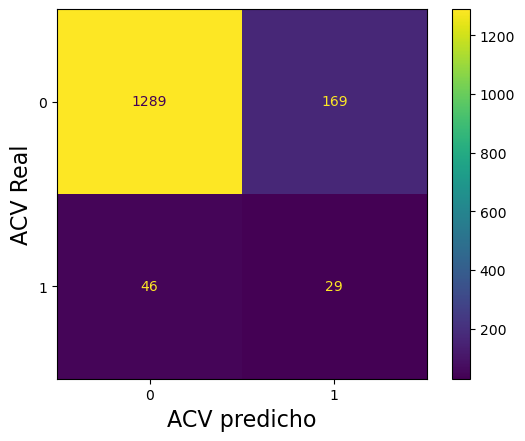


Reporte de clasificación:
              precision    recall  f1-score   support

      No ACV       0.97      0.88      0.92      1458
         ACV       0.15      0.39      0.21        75

    accuracy                           0.86      1533
   macro avg       0.56      0.64      0.57      1533
weighted avg       0.93      0.86      0.89      1533



In [5]:
#Modelo Naives-Bayes

nb = GaussianNB()
nb.fit(X_train, y_train)

# 5. Predecir y evaluar en el conjunto de test
y_pred = nb.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.xlabel('ACV predicho',fontsize=16)
plt.ylabel('ACV Real',fontsize=16)
plt.show()

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=['No ACV','ACV']))

Se puede observar de el modelo Naives Bayes que, aunque la presición general es buena, esta misma y mas importante, el recall para el caso de que si tiene un ACV son valores muy bajos, de 0.15 y 0.39 respectivamente, esto es algo problematico pues una prioridad que tenemos es evitar la mala clasificación de los pacientes que sí tienen un ACV, a continuación se realizará el modelo de Discriminante Lineal de Fischer.

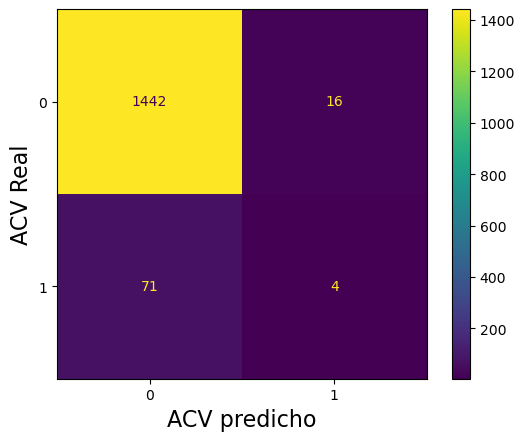


Reporte de clasificación:
              precision    recall  f1-score   support

      No ACV       0.95      0.99      0.97      1458
         ACV       0.20      0.05      0.08        75

    accuracy                           0.94      1533
   macro avg       0.58      0.52      0.53      1533
weighted avg       0.92      0.94      0.93      1533



In [6]:
#Modelo DL Fischer

DLf= LinearDiscriminantAnalysis().fit(X_train,y_train) # luego generamos el modelo y lo ajustamos

y_pred_DLf = DLf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_DLf)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.xlabel('ACV predicho',fontsize=16)
plt.ylabel('ACV Real',fontsize=16)
plt.show()

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_DLf, target_names=['No ACV','ACV']))

se puede observar que el desempeño de el modelo de Discriminante Lineal de Fischer presenta un desempeño con conclusión similar a el de Naives-Bayes, solo que peor, presentando un recall para ACV positivo de 0.05

pasaremos a realizar el modelo de Regresión Logística


Reporte de Clasificación para Regresión Logística:
              precision    recall  f1-score   support

      No ACV       0.98      0.73      0.84      1458
         ACV       0.13      0.77      0.22        75

    accuracy                           0.73      1533
   macro avg       0.56      0.75      0.53      1533
weighted avg       0.94      0.73      0.81      1533


Matriz de Confusión:


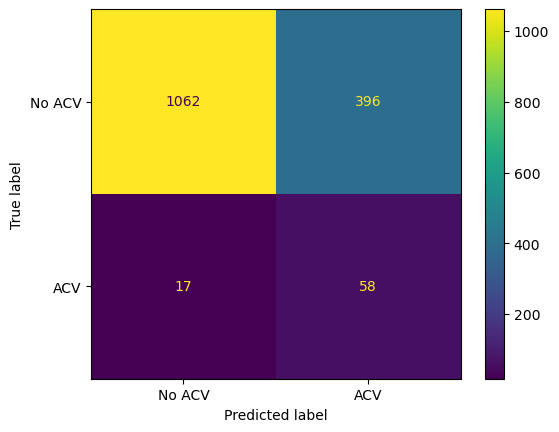

In [7]:
#Regresión Logística

# 1. Creamos el modelo de regresión logística
#    'class_weight="balanced"' es muy útil en datos desbalanceados como este,
#    ayuda al modelo a prestar más atención a la clase minoritaria (los casos de "Sí Stroke").
modelo_logistico = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# 2. Ajustamos el modelo con los datos de ENTRENAMIENTO del ACV.
#    Asegúrate de que estas variables (X_train, y_train) contienen los datos del ACV.
modelo_logistico.fit(X_train, y_train)

# 3. Usamos los datos de PRUEBA para predecir.
y_pred_logistico = modelo_logistico.predict(X_test)

# 4. Evaluamos qué tan bien le fue al modelo.
print("\nReporte de Clasificación para Regresión Logística:")
print(classification_report(y_test, y_pred_logistico, target_names=['No ACV', 'ACV']))

# 5. Visualizamos la matriz de confusión.
print("\nMatriz de Confusión:")
cm = confusion_matrix(y_test, y_pred_logistico)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No ACV', 'ACV'])
disp.plot()
plt.show()

Este modelo de regresión logistica nos entrega un resultado con la presición general de 0.73, menor a los demás modelos, pero un detalle importante es que el recall de el sí a un ACV es de 0.77, este es por mucho, el mas alto de los 3 modelos. Así que si fuera por presición general, tomaríamos el modelo de Discriminante Lineal de Fischer, pero como sabemos la importancia de evitar al maximo los falsos negativos, entonces concluimos que el modelo de mejor desempeño es el de Regresión Logística.

A continuación se procederá a realizar las graficas Presicion-Recall (PR) para determinar el mejor umbral para los modelos, y así obtener la mejor clasificación, buscando un recall mas alto posible para el caso positivo de un ACV

--- Regresión Logística ---
Mejor F1-Score: 0.3273 en el umbral: 0.8114

--- Análisis Discriminante Lineal ---
Mejor F1-Score: 0.3246 en el umbral: 0.1592

--- Naive-Bayes ---
Mejor F1-Score: 0.2500 en el umbral: 0.1048



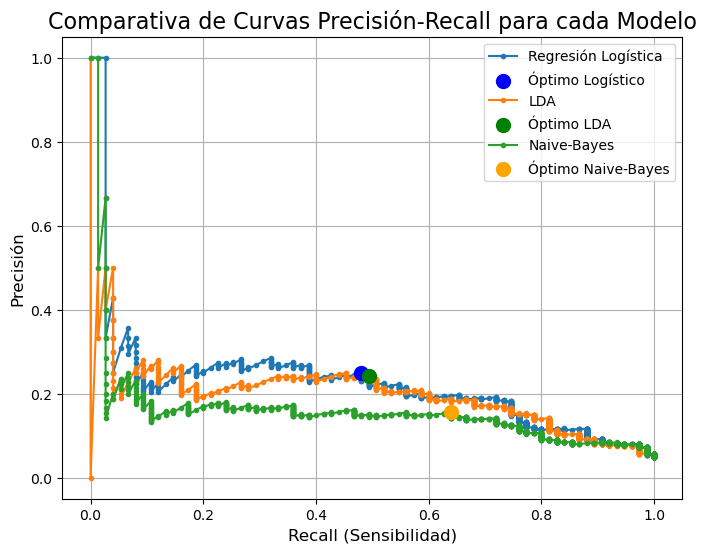


Reporte de Clasificación con el nuevo umbral optimo para Naives-Bayes:
              precision    recall  f1-score   support

      No ACV       0.98      0.82      0.89      1458
         ACV       0.16      0.64      0.25        75

    accuracy                           0.81      1533
   macro avg       0.57      0.73      0.57      1533
weighted avg       0.94      0.81      0.86      1533


Matriz de Confusión con el nuevo umbral optimo para Naives-Bayes:


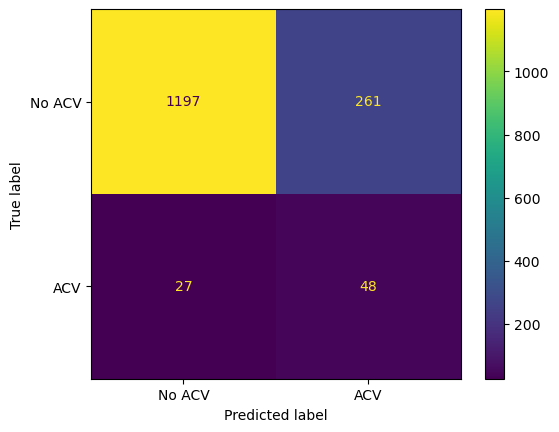

----------------------------------------------------------------------------------------------------

Reporte de Clasificación con el nuevo umbral optimo para Discriminante Lineal de Fischer:
              precision    recall  f1-score   support

      No ACV       0.97      0.92      0.95      1458
         ACV       0.24      0.49      0.32        75

    accuracy                           0.90      1533
   macro avg       0.61      0.71      0.64      1533
weighted avg       0.94      0.90      0.92      1533


Matriz de Confusión con el nuevo umbral optimo para Discriminante Lineal de Fischer:


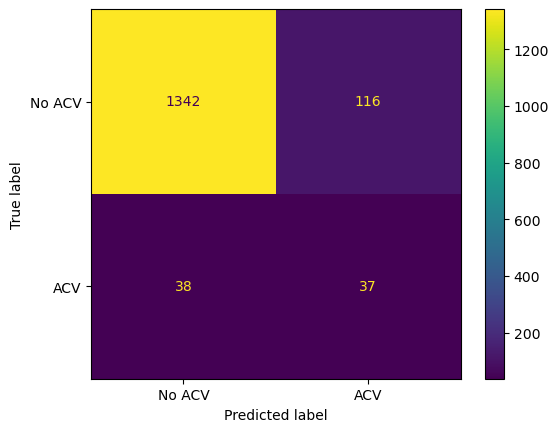

----------------------------------------------------------------------------------------------------

Reporte de Clasificación con el nuevo umbral optimo para Regresión Logística:
              precision    recall  f1-score   support

      No ACV       0.97      0.93      0.95      1458
         ACV       0.25      0.48      0.33        75

    accuracy                           0.90      1533
   macro avg       0.61      0.70      0.64      1533
weighted avg       0.94      0.90      0.92      1533


Matriz de Confusión con el nuevo umbral optimo para Regresión Logística:


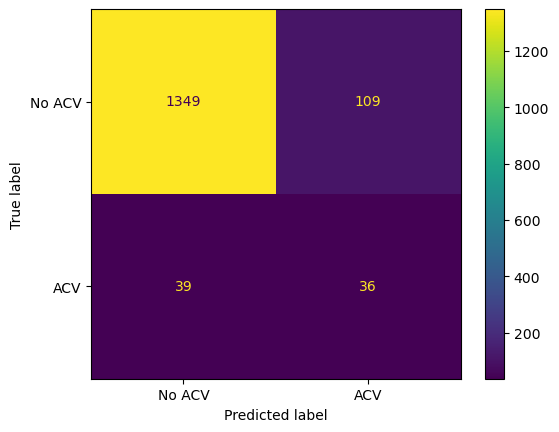

In [8]:
# --- CELDA UNIFICADA PARA COMPARAR CURVAS PRECISIÓN-RECALL ---

plt.figure(figsize=(8, 6))

# --- 1. Modelo de Regresión Logística ---
y_probs_log = modelo_logistico.predict_proba(X_test)[:, 1]
precision_log, recall_log, thresholds_log = precision_recall_curve(y_test, y_probs_log)
f1_scores_log = (2 * precision_log * recall_log) / (precision_log + recall_log + 1e-10)
best_f1_idx_log = np.argmax(f1_scores_log)
print(f"--- Regresión Logística ---")
print(f"Mejor F1-Score: {f1_scores_log[best_f1_idx_log]:.4f} en el umbral: {thresholds_log[best_f1_idx_log]:.4f}\n")
plt.plot(recall_log, precision_log, marker='.', label='Regresión Logística')
plt.scatter(recall_log[best_f1_idx_log], precision_log[best_f1_idx_log], marker='o', s=100, color='blue', zorder=5, label='Óptimo Logístico')
best_threshold_log = thresholds_log[best_f1_idx_log]

# --- 2. Modelo de Análisis Discriminante Lineal (LDA) ---
y_probs_lda = DLf.predict_proba(X_test)[:, 1]
precision_lda, recall_lda, thresholds_lda = precision_recall_curve(y_test, y_probs_lda)
f1_scores_lda = (2 * precision_lda * recall_lda) / (precision_lda + recall_lda + 1e-10)
best_f1_idx_lda = np.argmax(f1_scores_lda)
print(f"--- Análisis Discriminante Lineal ---")
print(f"Mejor F1-Score: {f1_scores_lda[best_f1_idx_lda]:.4f} en el umbral: {thresholds_lda[best_f1_idx_lda]:.4f}\n")
plt.plot(recall_lda, precision_lda, marker='.', label='LDA')
plt.scatter(recall_lda[best_f1_idx_lda], precision_lda[best_f1_idx_lda], marker='o', s=100, color='green', zorder=5, label='Óptimo LDA')
best_threshold_DLf = thresholds_lda[best_f1_idx_lda]

# --- 3. Modelo Naive-Bayes ---
y_probs_bayes = nb.predict_proba(X_test)[:, 1]
precision_bayes, recall_bayes, thresholds_bayes = precision_recall_curve(y_test, y_probs_bayes)
f1_scores_bayes = (2 * precision_bayes * recall_bayes) / (precision_bayes + recall_bayes + 1e-10)
best_f1_idx_bayes = np.argmax(f1_scores_bayes)
print(f"--- Naive-Bayes ---")
print(f"Mejor F1-Score: {f1_scores_bayes[best_f1_idx_bayes]:.4f} en el umbral: {thresholds_bayes[best_f1_idx_bayes]:.4f}\n")
plt.plot(recall_bayes, precision_bayes, marker='.', label='Naive-Bayes')
plt.scatter(recall_bayes[best_f1_idx_bayes], precision_bayes[best_f1_idx_bayes], marker='o', s=100, color='orange', zorder=5, label='Óptimo Naive-Bayes')
best_threshold_bayes = thresholds_bayes[best_f1_idx_bayes]

# --- Configuraciones del Gráfico ---
plt.title('Comparativa de Curvas Precisión-Recall para cada Modelo', fontsize=16)
plt.xlabel('Recall (Sensibilidad)', fontsize=12)
plt.ylabel('Precisión', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Aplicamos el nuevo umbral para ver el nuevo reporte de clasificación
y_pred_nuevo_umbral_nb = (y_probs_bayes >= best_threshold_bayes).astype(int)

print("\nReporte de Clasificación con el nuevo umbral optimo para Naives-Bayes:")
print(classification_report(y_test, y_pred_nuevo_umbral_nb, target_names=['No ACV', 'ACV']))

print("\nMatriz de Confusión con el nuevo umbral optimo para Naives-Bayes:")
cm_nuevo = confusion_matrix(y_test, y_pred_nuevo_umbral_nb)
disp_nuevo = ConfusionMatrixDisplay(confusion_matrix=cm_nuevo, display_labels=['No ACV', 'ACV'])
disp_nuevo.plot()
plt.show()

print("-"*100)

y_pred_nuevo_umbral_DLf = (y_probs_lda >= best_threshold_DLf).astype(int)

print("\nReporte de Clasificación con el nuevo umbral optimo para Discriminante Lineal de Fischer:")
print(classification_report(y_test, y_pred_nuevo_umbral_DLf, target_names=['No ACV', 'ACV']))

print("\nMatriz de Confusión con el nuevo umbral optimo para Discriminante Lineal de Fischer:")
cm_nuevo = confusion_matrix(y_test, y_pred_nuevo_umbral_DLf)
disp_nuevo = ConfusionMatrixDisplay(confusion_matrix=cm_nuevo, display_labels=['No ACV', 'ACV'])
disp_nuevo.plot()
plt.show()

print("-"*100)

y_pred_nuevo_umbral_log = (y_probs_log >= best_threshold_log).astype(int)

print("\nReporte de Clasificación con el nuevo umbral optimo para Regresión Logística:")
print(classification_report(y_test, y_pred_nuevo_umbral_log, target_names=['No ACV', 'ACV']))

print("\nMatriz de Confusión con el nuevo umbral optimo para Regresión Logística:")
cm_nuevo = confusion_matrix(y_test, y_pred_nuevo_umbral_log)
disp_nuevo = ConfusionMatrixDisplay(confusion_matrix=cm_nuevo, display_labels=['No ACV', 'ACV'])
disp_nuevo.plot()
plt.show()

Se ha obtenido el siguiente desempeño para los 3 modelos con el umbral ajustado: 
- Naives-Bayes: recall de 0.64 para ACV, y una precisión de 0.81 con un umbral de 0.1048
- Discriminante Lineal: recall de 0.49 para ACV, y una precisión de 0.90 con un umbral de 0.1592
- Regresión Logística: recall de 0.48 para ACV, y una precisión de 0.90 con un umbral de 0.8114

podemos decir que el desempeño de el modelo Naives-Bayes y el modelo de Discriminante lineal mejoraron sustancialmente, en terminos de el recall o el ratio de verdaderos positivos de el caso donde si hay ACV, lo cual es bueno, pero en el caso de el modelo de regresión logistica, este recall no mejoró, pues su recall anterior es de 0.77 para ACV con una precisión de 
0.73, teniendo en cuenta que queremos priorizar este recall pues no nos podemos permitir el ignorar un posible caso de ACV, podemos concluir lo siguiente:
- Para nuestro escenario clínico donde perder un caso real de ACV (falso negativo) es más grave que alertar en exceso (falsos positivos), la mejor opción a seguir sería el modelo de regresión logistica con el umbral de 0.5.